In [208]:
import kagglehub

path = kagglehub.dataset_download("gauravmalik26/food-delivery-dataset/versions/1")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\hesha\.cache\kagglehub\datasets\gauravmalik26\food-delivery-dataset\versions\1


In [209]:
import pandas as pd

df = pd.read_csv(f"{path}/train.csv")

In [210]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [212]:
df = df.drop(columns=["ID", "Delivery_person_ID"])

In [213]:
df["Time_taken(min)"] = df["Time_taken(min)"].apply(lambda x: x.split(" ")[1].strip())
df["Weatherconditions"] = df["Weatherconditions"].apply(lambda x: x.split(" ")[1].strip())

In [214]:
print(len(df[df.duplicated()])>0)

False


In [215]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)


In [216]:
for col in df.columns:
    print(col, df[col].value_counts())
    print()

Delivery_person_Age Delivery_person_Age
35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
50.0      53
15.0      38
Name: count, dtype: int64

Delivery_person_Ratings Delivery_person_Ratings
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

Restaurant_latitude Restaurant_latitude
 0.000000     3640
 26.911378     182
 26.914142     180
 26.902940     176
 26.902908     176
              ... 
-12.326356       1
-22.577821       1
-22.569367       1
-30.890184       1
-12.97

In [217]:
import numpy as np
#Convert 'NaN' to np.nan
def convert_nan(dataframe):
    dataframe.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)

In [218]:
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
Restaurant_latitude               0
Restaurant_longitude              0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_latitude        0
Delivery_location_longitude       0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_taken(min)                   0
dtype: int64

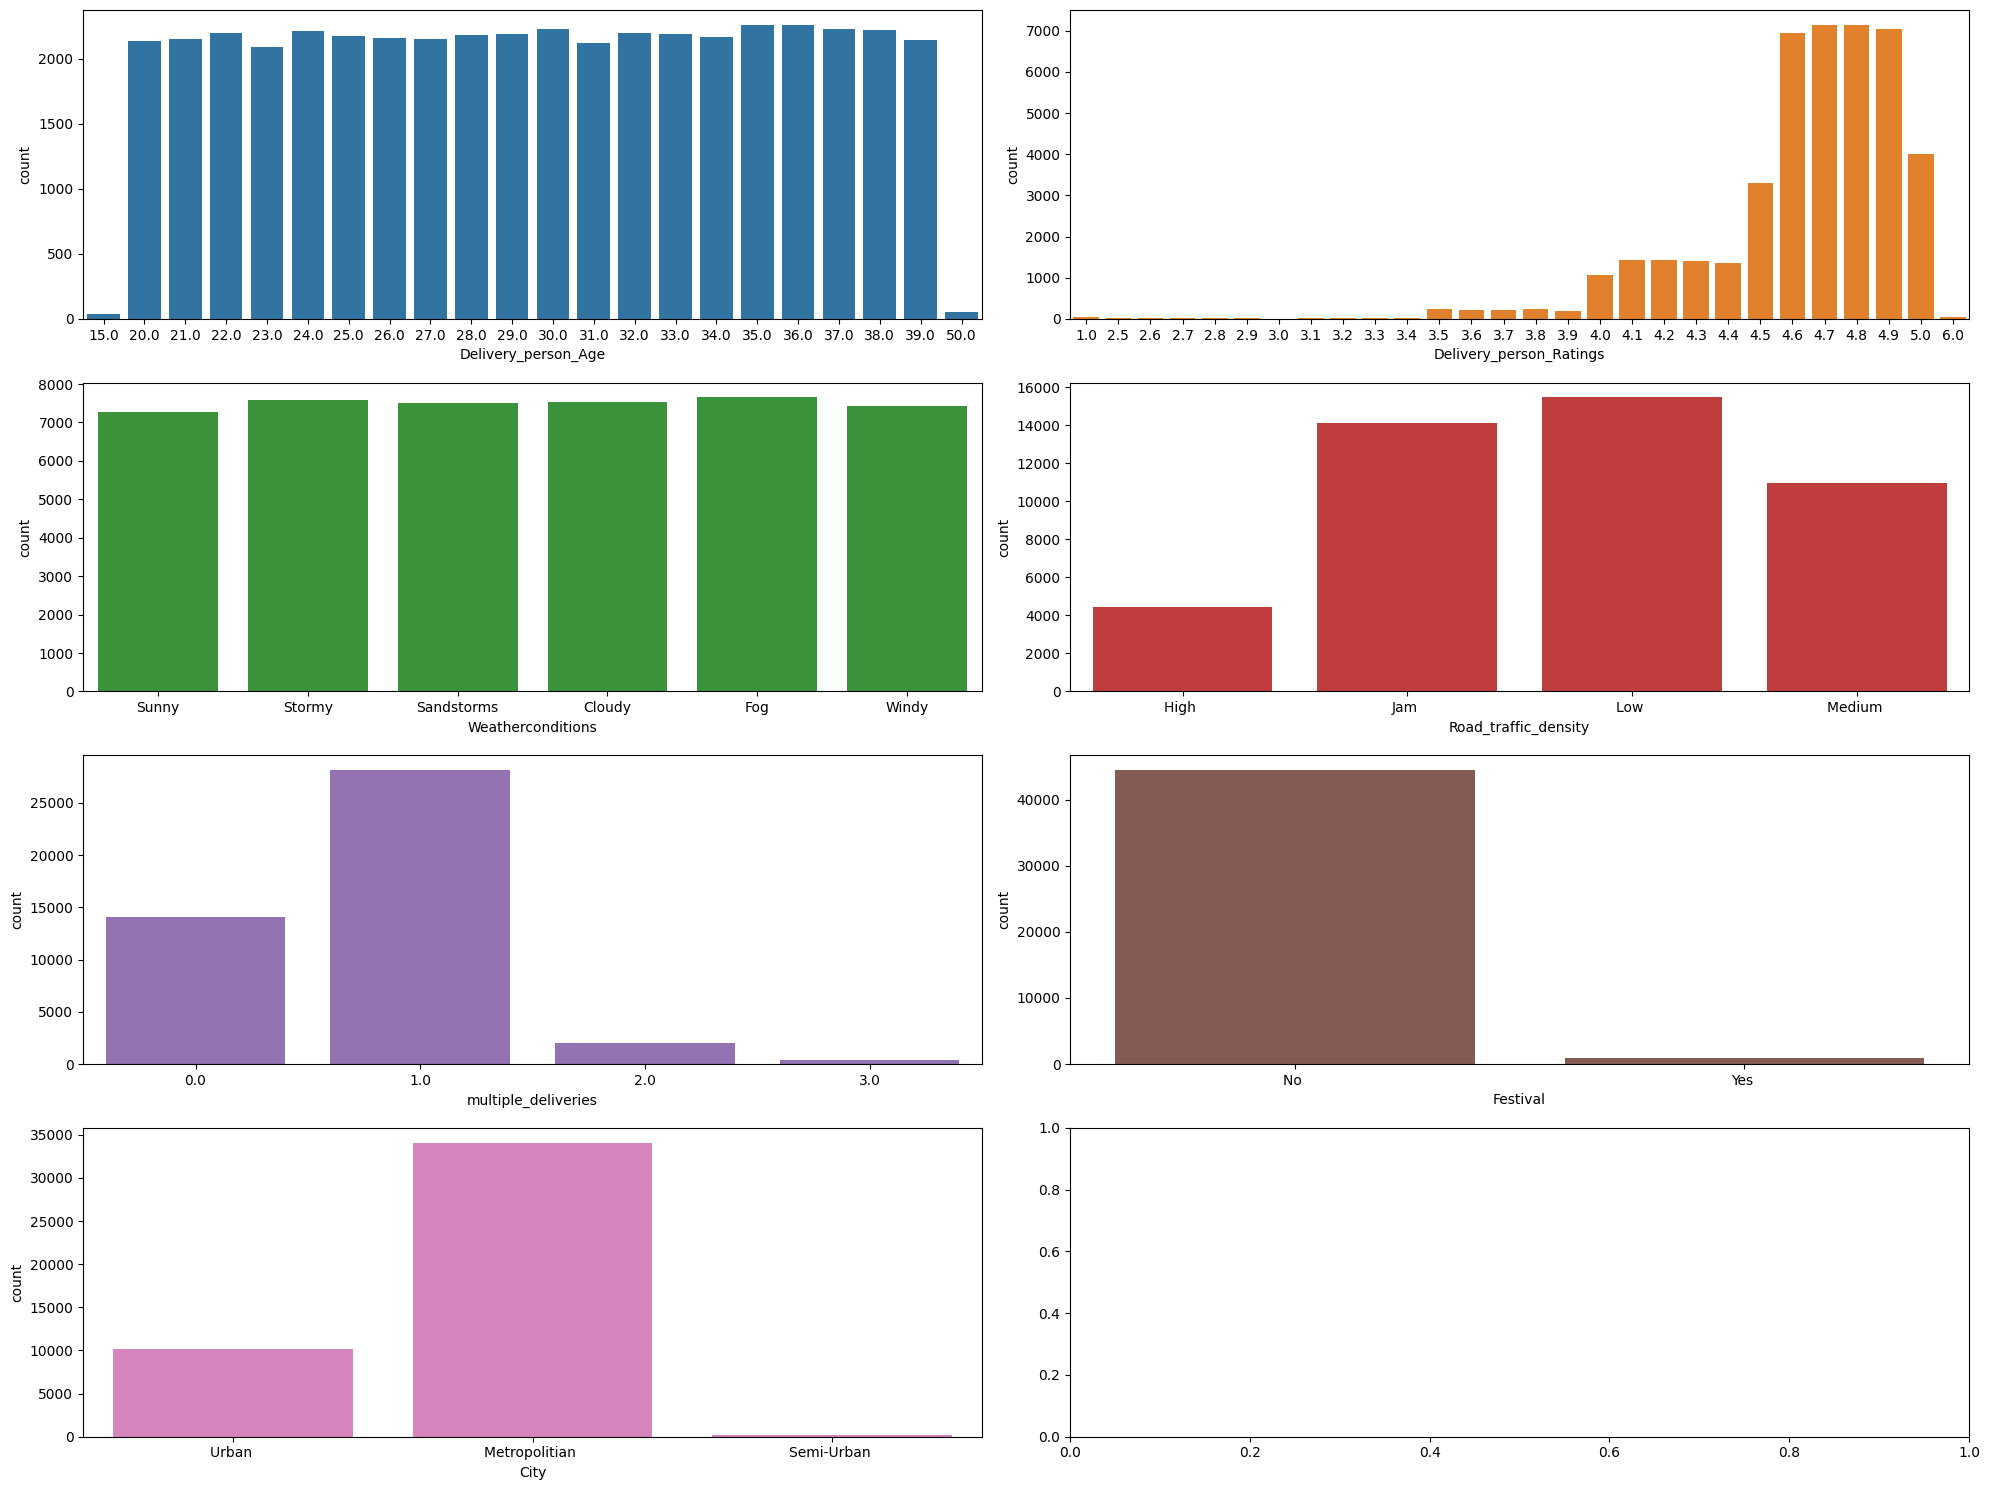

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(20,15))
columns = ['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City']

for i, column in enumerate(columns):
    # every bar should have a random color
    color = sns.color_palette()[i]
    sns.countplot(x=column, data=df, ax=axs[i//2, i%2], color=color)

plt.tight_layout()
plt.show()

In [231]:
df["Weatherconditions"] = df["Weatherconditions"].fillna(df["Weatherconditions"].mode()[0])
df["Road_traffic_density"] = df["Road_traffic_density"].fillna(df["Road_traffic_density"].mode()[0])
df["City"] = df["City"].fillna(df["City"].mode()[0])
df["multiple_deliveries"] = df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0])
df["Festival"] = df["Festival"].fillna(df["Festival"].mode()[0])
df["Delivery_person_Age"] = df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].mean())
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean())